In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from _lib.preprocess import preprocess_missing as prep
from _lib.preprocess import get_instruction as info

In [2]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

In [18]:
plt.style.use("seaborn")

In [4]:
df = pd.read_csv("_database/Input/train.csv", index_col = 0)

In [5]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df = prep(df)

C:\Anaconda\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1457 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1457 non-null category
MSZoning         1457 non-null category
LotFrontage      1457 non-null float64
LotArea          1457 non-null int64
Street           1457 non-null category
Alley            1457 non-null category
LotShape         1457 non-null category
LandContour      1457 non-null category
Utilities        1457 non-null category
LotConfig        1457 non-null category
LandSlope        1457 non-null category
Neighborhood     1457 non-null category
Condition1       1457 non-null category
Condition2       1457 non-null category
BldgType         1457 non-null category
HouseStyle       1457 non-null category
OverallQual      1457 non-null category
OverallCond      1457 non-null category
YearBuilt        1457 non-null int64
YearRemodAdd     1457 non-null int64
RoofStyle        1457 non-null category
RoofMatl         1457 non-null category
Exterior1st      1457 n

In [8]:
def ecdf(values):
    x = np.sort(values)
    y = np.arange(1, len(x)+1) / len(x)
    return x, y

In [25]:
def ecdf_compare(values, dist):

    x_data, y_data = ecdf(values)
    x_theory, y_theory = ecdf(dist)
    
    _ = plt.plot(x_data, y_data, marker = ".", linestyle = "none", label = "Data")
    _ = plt.plot(x_theory, y_theory, color = "orange", label = "Theory")
    _ = plt.xlabel("Values")
    _ = plt.ylabel("CDF")
    plt.legend()
    return 

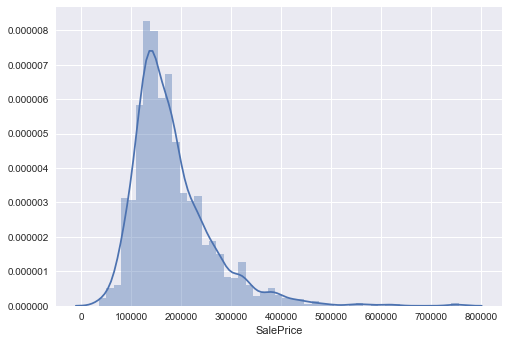

In [26]:
sns.distplot(df["SalePrice"])

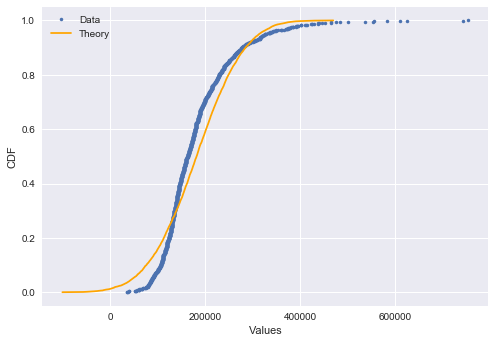

In [29]:
mu = np.mean(df["SalePrice"])
sigma = np.std(df["SalePrice"])

normal_val = np.random.normal(mu, sigma, size = 10000)
ecdf_compare(df["SalePrice"], normal_val)

It doesn't close to normal distribution. We can also try if the distribution is log normal, to do that, we first create a variable log values and compare its ecdf with normal distribution

In [30]:
df["LogSalePrice"] = np.log(df["SalePrice"])

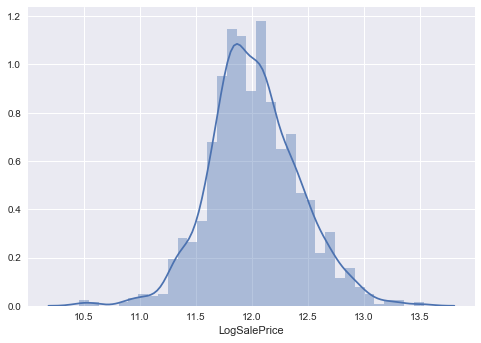

In [33]:
sns.distplot(df["LogSalePrice"])

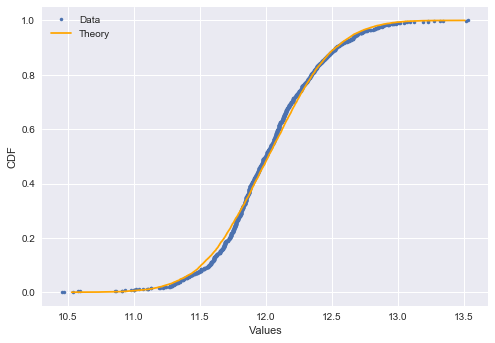

In [31]:
mu = np.mean(df["LogSalePrice"])
sigma = np.std(df["LogSalePrice"])

normal_val = np.random.normal(mu, sigma, size = 10000)
ecdf_compare(df["LogSalePrice"], normal_val)

We can conclude that the distribution of log sale price is normal, so we can consider log sale price as the response variable